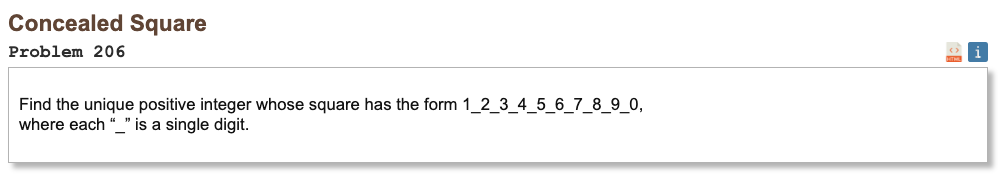

## Initial approach

* the square sits between 1020304050607080900 and 1929394959697989990 so the root is in a tight numeric range
* the square ends with a 0 so the root must end with 0
* for a square to end with 900, the root must end with 30 or 70, this cuts the search by a lot
* loop through candidates in the root range, stepping by 100, and only testing those ending in 30 or 70
* for each candidate, square it and check the fixed digits from right to left
* do the digit check using integer math by repeatedly taking sq % 10
* dividing by 100 to skip the unknown digit each time

In [1]:
import math

def matches_pattern(sq: int) -> bool:
    for d in [0, 9, 8, 7, 6, 5, 4, 3, 2, 1]:
        if sq % 10 != d:
            return False
        sq //= 100
    return True

low = 1020304050607080900
high = 1929394959697989990

a = math.isqrt(low)
if a * a < low:
    a += 1
b = math.isqrt(high)

start = b - (b % 100) + 70
if start > b:
    start -= 100

result = None
for n in range(start, a - 1, -100):
    if n % 100 not in (30, 70):
        continue
    sq = n * n
    if matches_pattern(sq):
        result = n
        break

print("Result:", result)

Result: 1389019170
